In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

CLASSIFICATION OF HEART DISEASE(1/0) BASED ON MULTIPLE INPUT FEATURES

In [4]:
df = pd.read_csv("Heart_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

FEATURE SELECTION 

FINDING CORRELATION BETWEEN FEATURES


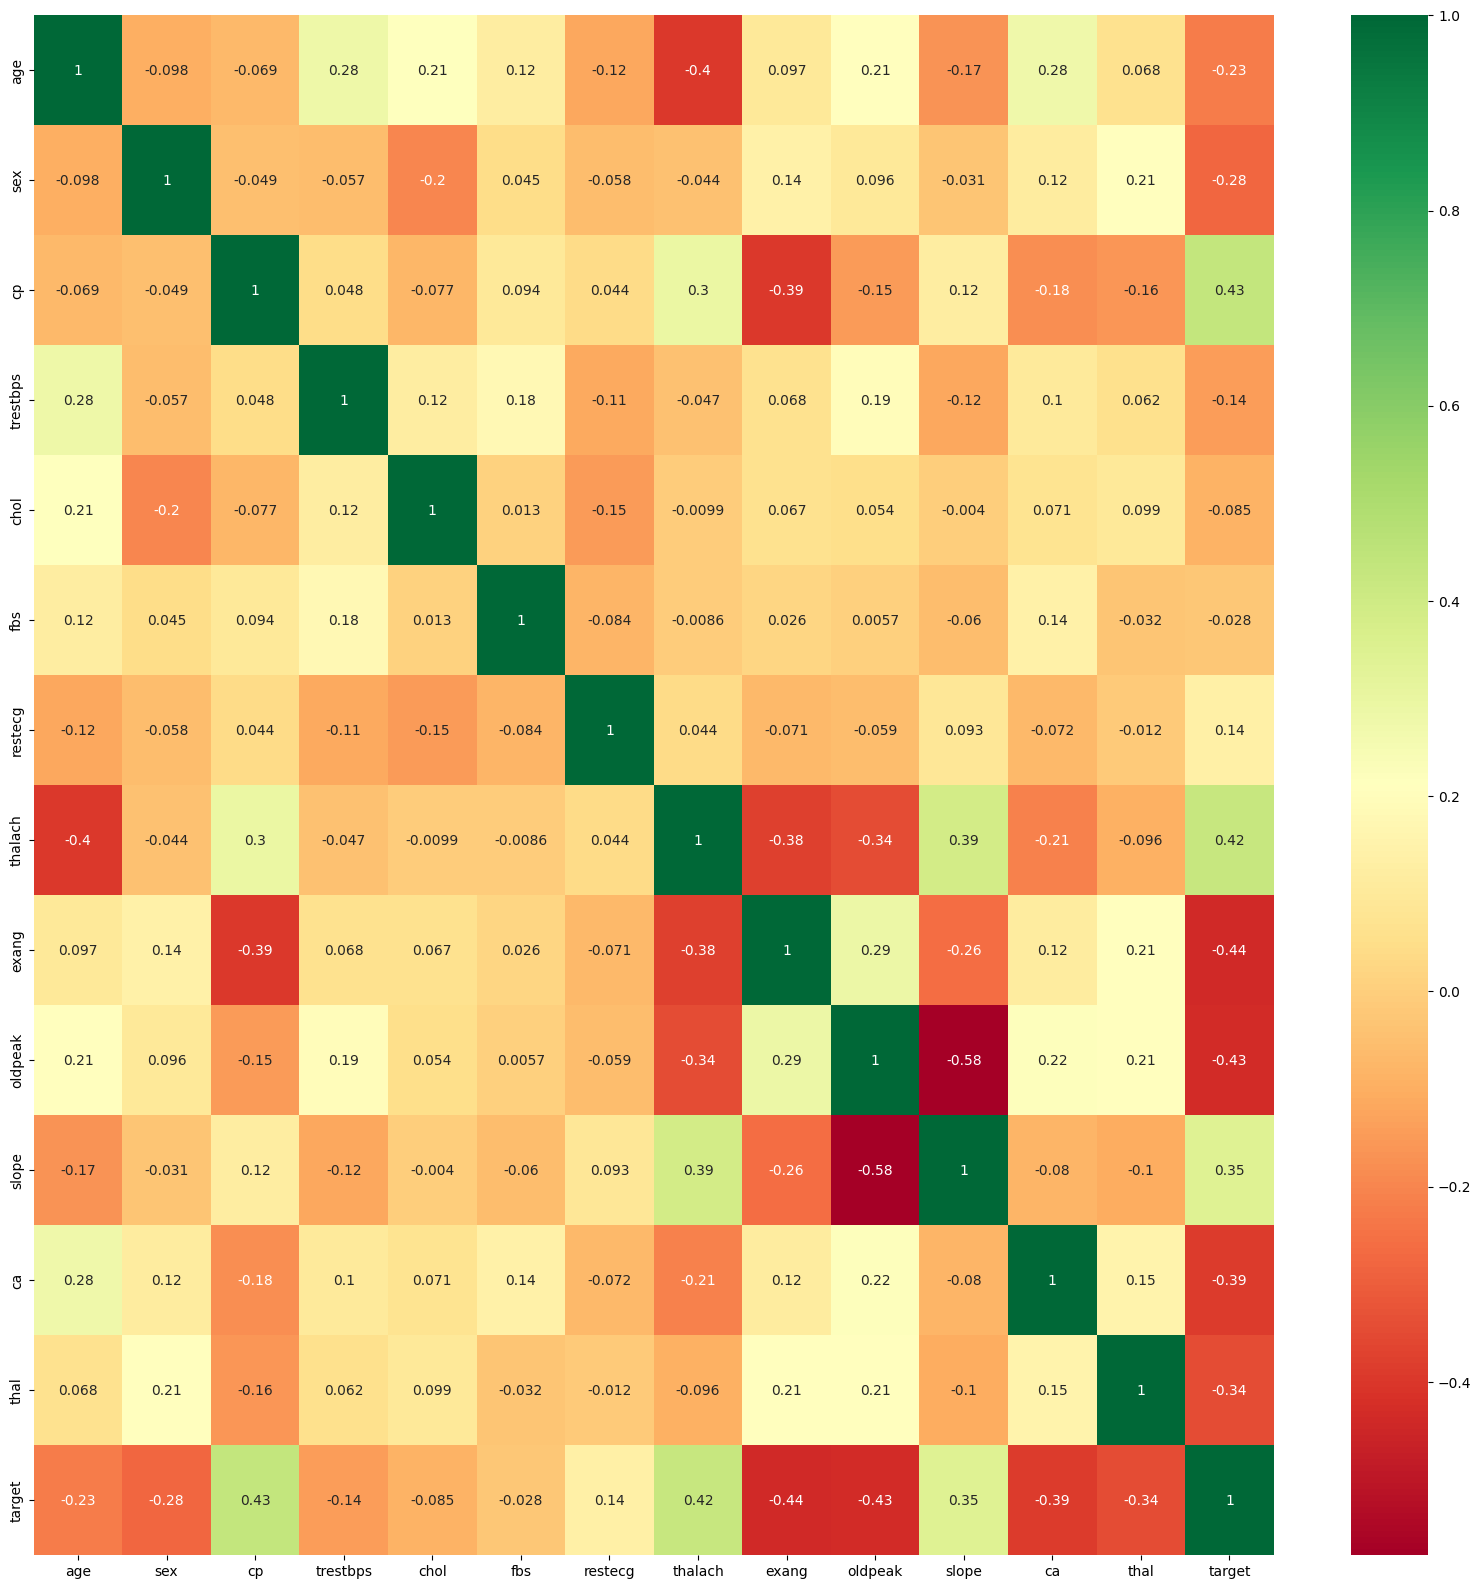

In [8]:
import seaborn as sns
corrmat = df.corr()
top_corr_features  = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(),annot = True,cmap="RdYlGn")

In [9]:
corr_data= df[top_corr_features].corr()
corr_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

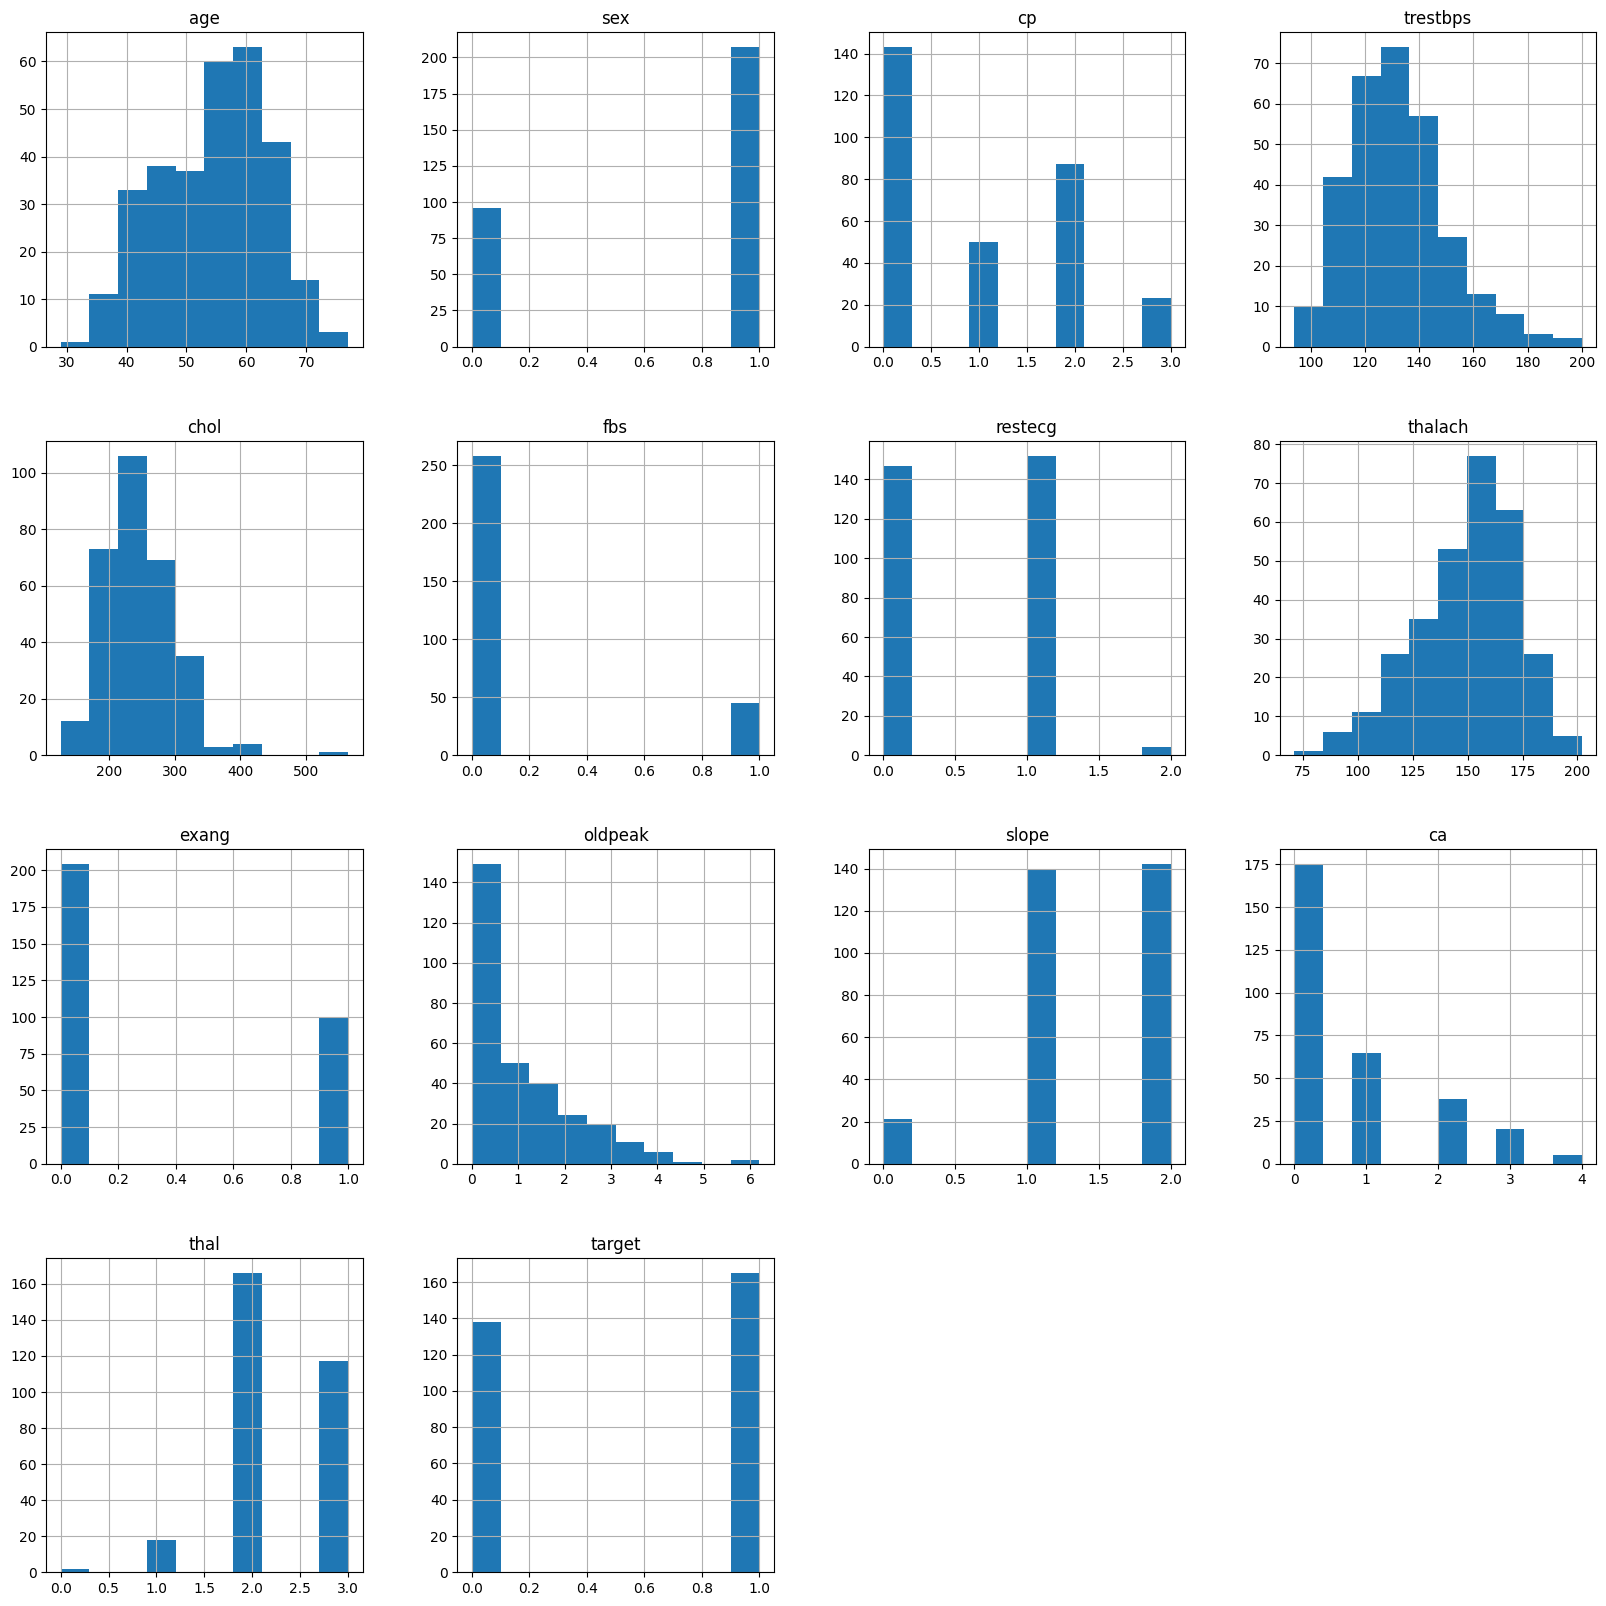

In [10]:
df.hist(figsize=(20,20))

<Axes: xlabel='target', ylabel='count'>

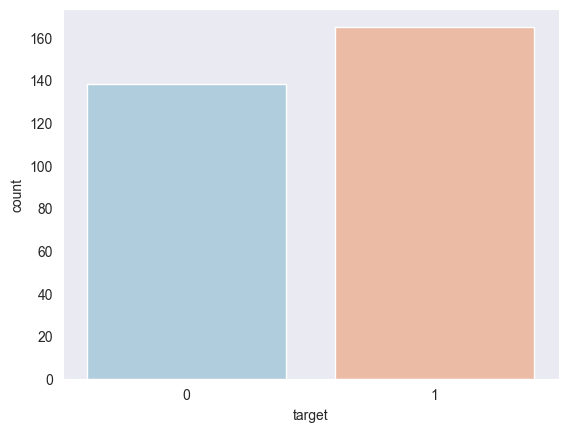

In [12]:
sns.set_style('dark') #["white","whitegrid","dark","darkgrid","ticks"]
sns.countplot(x='target',data=df,palette='RdBu_r')

DATA PROCESSING - CONVERTING ALL THE CATEGORICAL DATA INTO DUMMIES 

DUMMIES - EACH DISTINCT CATEGORY BECOMES THE EACH SEPERATE COLUMN WITH (1/0) 

IF A COLUMN HAS 3 CATEGORIES (A,B,C) - AFTER DUMMIES - A | B | C 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.encoding:

get_dummies(data, prefix=None, prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'NpDtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Each variable is converted in as many 0/1 variables as there are different
    values. Columns in the output are each named after a value; if the input is
    a DataFrame, the name of the original variable is prepended to the value.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a diction

In [15]:
dataset = pd.get_dummies(df, columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'],dtype=int)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale =  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [17]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [20]:
y= dataset['target']
X=dataset.drop(['target'],axis=1)


In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=10)

X_train, X_test are of different distributions so Standardscaler convert to normal distributions 

y_train already in 0's and 1's

In [75]:
x_tr=standardScaler.fit_transform(X_train)
x_te=standardScaler.fit_transform(X_test)

KNN CLASSIFICATION

1)When does KNN works well - DATASET IS NOT TOO LARGE,CLASSES ARE WELL-SEPERATED, LOW-DIMENSION DATA,NON-PARAMETRIC METHOD ( No assumptions about the data)

2)KNN IS LAZY LEARNER

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_score = []
for i in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn_classifier,X,y,cv=10)
    knn_score.append(score.mean())
print("best k value = ",knn_score.index(max(knn_score))+1)
knn_cross_score = max(knn_score)

best k value =  9


Text(0.5, 1.0, 'KNN classifier scores for different K values')

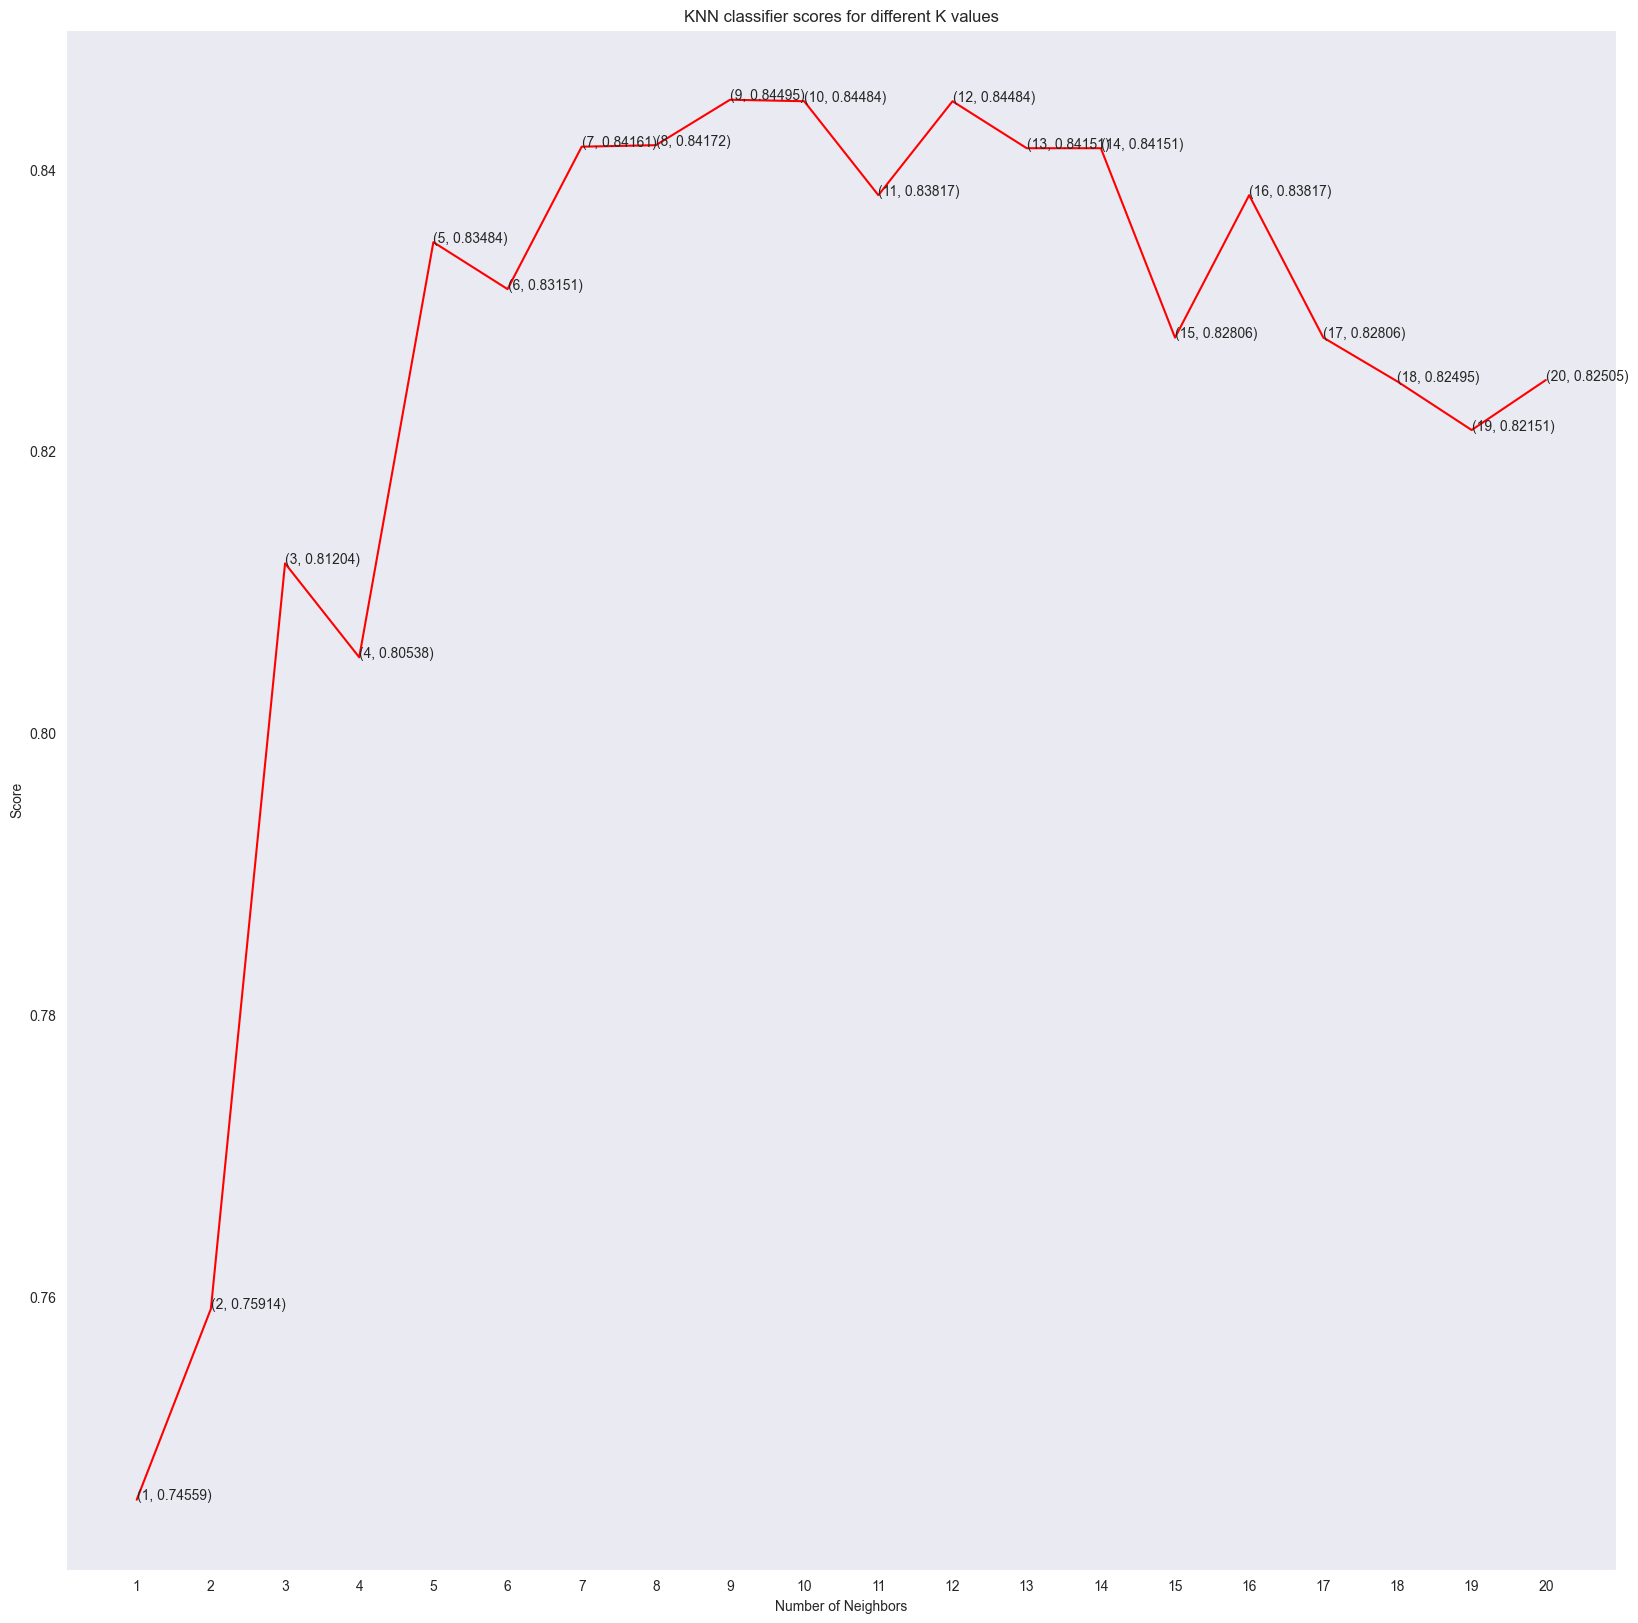

In [81]:
plt.figure(figsize=(20,20))
plt.plot([k for k in range(1,21)],knn_score, color = 'red')
for i in range(1,21):
    plt.text(i,knn_score[i-1],(i,round(knn_score[i-1],5)))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.title('KNN classifier scores for different K values')

In [110]:
knn_classifier = KNeighborsClassifier(n_neighbors=9)
score = cross_val_score(knn_classifier,x_tr,y_train,cv=10)
score.mean()
knn_classifier.fit(x_tr,y_train)

KNeighborsClassifier(n_neighbors=9)

RANDOM FOREST CLASSIFIER

In [102]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier(n_estimators=15)
score=cross_val_score(randomforest_classifier,x_tr,y_train,cv=10)
randomforest_classifier.fit(x_tr,y_train)

RandomForestClassifier(n_estimators=15)

In [103]:
random_cross_score = score.mean()

DECISION TREE

In [104]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=5,ccp_alpha=0.01, random_state=4)
decison_classifier = classifier.fit(x_tr,y_train)

[Text(0.4666666666666667, 0.9166666666666666, 'x[7] <= 0.091\ngini = 0.489\nsamples = 242\nvalue = [103, 139]'),
 Text(0.26666666666666666, 0.75, 'x[21] <= -0.202\ngini = 0.298\nsamples = 132\nvalue = [24, 108]'),
 Text(0.3666666666666667, 0.8333333333333333, 'True  '),
 Text(0.13333333333333333, 0.5833333333333334, 'x[19] <= 0.091\ngini = 0.47\nsamples = 37\nvalue = [14, 23]'),
 Text(0.06666666666666667, 0.4166666666666667, 'gini = 0.278\nsamples = 24\nvalue = [4, 20]'),
 Text(0.2, 0.4166666666666667, 'gini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(0.4, 0.5833333333333334, 'x[3] <= 0.451\ngini = 0.188\nsamples = 95\nvalue = [10, 85]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[5] <= 0.321\ngini = 0.331\nsamples = 43\nvalue = [9, 34]'),
 Text(0.26666666666666666, 0.25, 'x[2] <= 0.296\ngini = 0.453\nsamples = 26\nvalue = [9, 17]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.278\nsamples = 18\nvalue = [3, 15]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.375\nsa

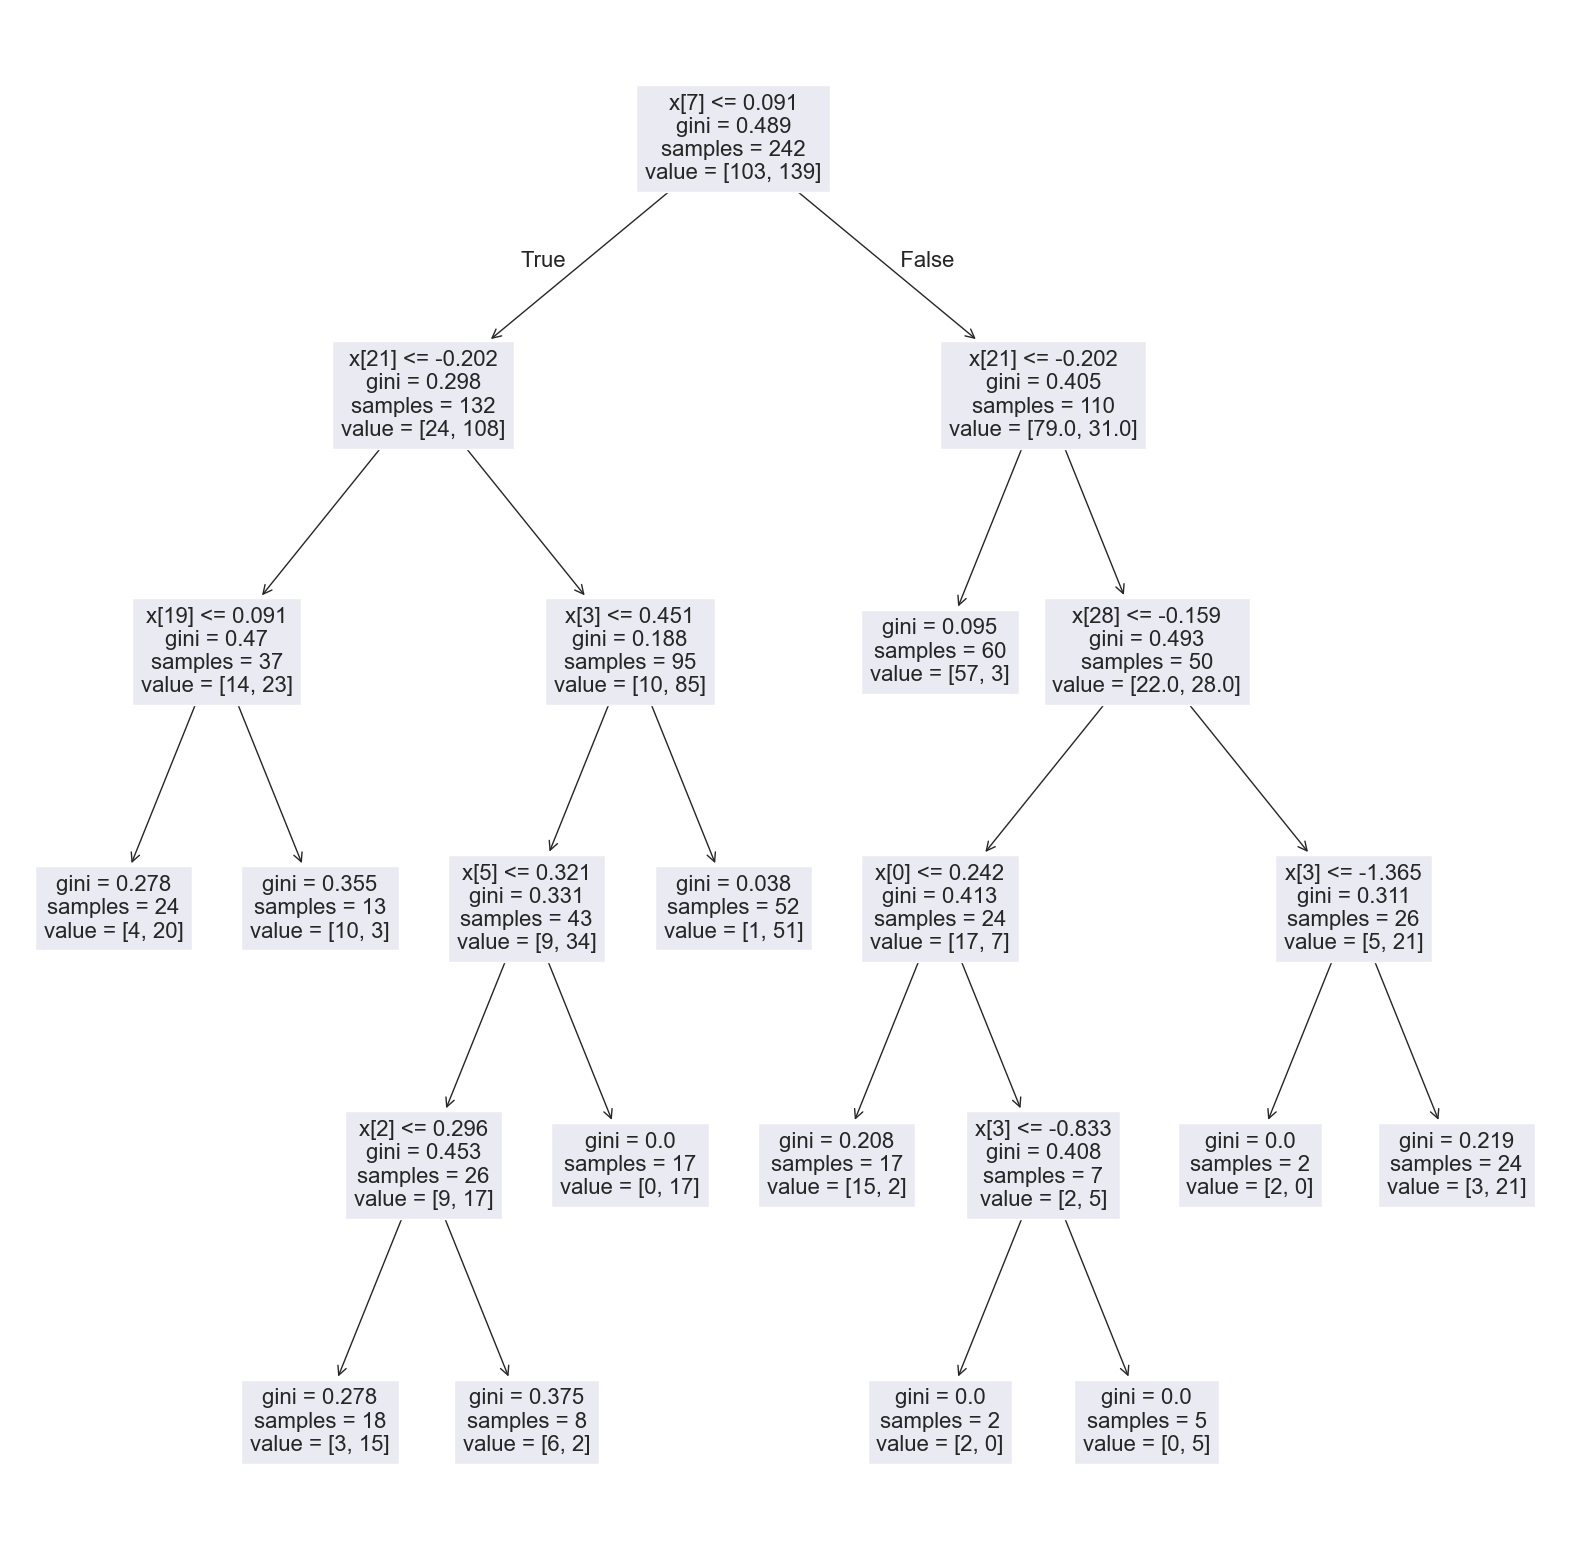

In [105]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(decison_classifier)

In [106]:
Dt_cross_score = cross_val_score(decison_classifier,x_tr,y_train,cv=10).mean()

FOR FINDING BEST MODEL , USE GRIDSEARCHCV 

GRIDSEARCHCV - performs an exhaustive search over all combinations of hyperparameters specified in a grid.

RANDOMIZEDSEARCHCV - randomly selects combinations of hyperparameters and evaluates the model.

GridsearchCV and RandomizedSearchCV can be used with any algorithm which has tunable hyperparameters

exmaples : 
Decision Trees (max_depth, min_samples_split).

SVM (C, kernel).

KNN (n_neighbors).

Random Forest (n_estimators, max_features).

Gradient Boosting and XGBoost.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [2,4,6,8,10,None],
    'min_samples_split' : [2,5,10,20],
    'min_samples_leaf' : [1,2,5,10]
}

grid_search = GridSearchCV(estimator=decison_classifier,param_grid=param_grid,cv=10,scoring='accuracy',verbose=1,n_jobs=-1)
grid_search.fit(x_tr,y_train)

print("best_paramters : ",grid_search.best_params_)
print("best_cross_validation accuracy : ",grid_search.best_score_)

best_Dt = grid_search.best_estimator_
y_pred = best_Dt.predict(x_te)

print("accuracy", accuracy_score(y_test,y_pred))

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
best_paramters :  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 20}
best_cross_validation accuracy :  0.8351666666666666
accuracy 0.7868852459016393


In [116]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=4,
                       min_samples_leaf=5, min_samples_split=20,
                       random_state=4)

In [120]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 20}

In [117]:
decison_classifier=DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=4,
                       min_samples_leaf=5, min_samples_split=20,
                       random_state=4)
decison_classifier.fit(x_tr,y_train)
# Predicting the Test set results
decision_pred=decison_classifier.predict(x_te)

CONCLUSIONS AND COMPARISONS

CROSS VALIDATION SCORE IS THE MEAN OF ALL THE CROSS FOLDS ACCURACIES

In [118]:
print("knn_cross_score : ",knn_cross_score)
print("random_cross_score : ",random_cross_score)
print("decision_tree_cross_score : ",Dt_cross_score)

knn_cross_score :  0.8449462365591398
random_cross_score :  0.8394999999999999
decision_tree_cross_score :  0.8025


In [119]:
knn_pred = knn_classifier.predict(x_te)
randomforest_pred = randomforest_classifier.predict(x_te)
decision_pred = decison_classifier.predict(x_te)
pred = [knn_pred,randomforest_pred,decision_pred]
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("KNN accuracy : ",accuracy_score(y_test,knn_pred))
print("RandomForest accuracy : ",accuracy_score(y_test,randomforest_pred))
print("Decision_trees accuracy : ",accuracy_score(y_test,decision_pred))

KNN accuracy :  0.8524590163934426
RandomForest accuracy :  0.8032786885245902
Decision_trees accuracy :  0.7868852459016393
